In [1]:
import pandas as pd 
lines = open('./data/es.txt','r').readlines()
lines = [line.replace(' ','') for line in lines]

In [2]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [5]:
import pandas as pd
es = pd.read_csv('./data/es50.txt',index_col=0,parse_dates=True,sep=';',dayfirst=True)

In [7]:
import numpy as np
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
data,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [8]:
del es['DEL']

In [9]:
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [11]:
# cols = ['SX5P','SX5E','SXXP','SXXE','SXXF','SXXA','DK5F','DKXF']
vs = pd.read_csv('./data/vs.txt',index_col=0,header=2,parse_dates=True,sep=',',dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [22]:
import datetime as dt
datas = pd.DataFrame({'EURPSTOXX':es['SX5E'][es.index>dt.datetime(1999,1,1)]})
datas = datas.join(pd.DataFrame({'VSTOXX':vs['V2TX'][vs.index>dt.datetime(1999,1,1)]}))

In [23]:
data = datas.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EURPSTOXX    4554 non-null float64
VSTOXX       4554 non-null float64
dtypes: float64(2)
memory usage: 266.7 KB


In [24]:
data

,EURPSTOXX,VSTOXX
data,,
1999-01-04,3543.10,18.2033
1999-01-05,3604.67,29.6912
1999-01-06,3685.36,25.1670
1999-01-07,3627.87,32.5205
1999-01-08,3616.57,33.2296
1999-01-11,3546.40,36.8411
1999-01-12,3502.38,37.5664
1999-01-13,3336.45,39.7373
1999-01-14,3365.43,39.1373


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015973E9A390>,
      dtype=object)

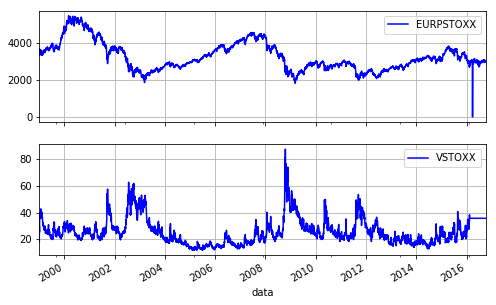

In [26]:
data.plot(subplots=True,grid=True,style='b',figsize=(8,5))

In [27]:
# 对数收益率
rets = np.log(data/data.shift(1))
rets.head()

C:\ProgramData\Anaconda3\envs\py3.6\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,EURPSTOXX,VSTOXX
data,,
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015973A6CC50>,
      dtype=object)

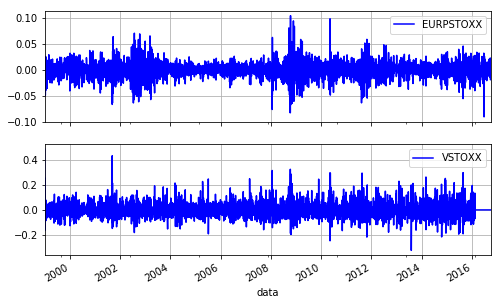

In [28]:
rets.plot(subplots=True,grid=True,style='b',figsize=(8,5))

In [35]:
import  statsmodels.api as sm
# 取出NAN和INF数值
rets[np.isnan(rets)] = 0
rets[np.isinf(rets)] = 0

xdat = sm.add_constant(rets['EURPSTOXX'])
ydat = rets['VSTOXX']
model = sm.OLS(ydat,xdat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VSTOXX   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     5042.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:34:33   Log-Likelihood:                 8271.0
No. Observations:                4554   AIC:                        -1.654e+04
Df Residuals:                    4552   BIC:                        -1.653e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.945e-05      0.001      0.085      0.932      -0.001       0.001
EURPSTOXX     -2.7539      0.039    -71.008      0.000      -2.830      -2.678
==============================================================================
Omnibus:                     1298.505   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24719.917
Skew:                           0.875   Prob(JB):                         0.00
Kurtosis:                      14.279   Cond. No.                         66.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model.params

const        0.000049
EURPSTOXX   -2.753853
dtype: float64

Text(0, 0.5, 'VSTOXX  returns')

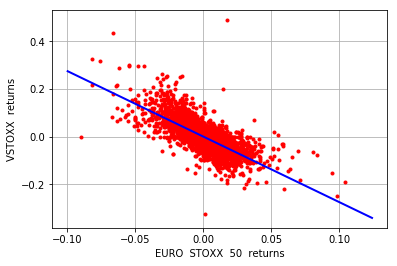

In [42]:
import matplotlib.pyplot as plt
plt.plot(rets['EURPSTOXX'],ydat,'r.')
ax = plt.axis()
x = np.linspace(ax[0],ax[1]+0.01)
plt.plot(x,model.params.const+model.params.EURPSTOXX*x,'b',lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO  STOXX  50  returns')
plt.ylabel('VSTOXX  returns')

In [43]:
rets.corr()

,EURPSTOXX,VSTOXX
EURPSTOXX,1.000000,-0.724945
VSTOXX,-0.724945,1.000000


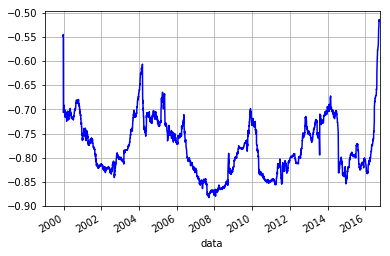

In [46]:
rets['EURPSTOXX'].rolling(252).corr(ydat).plot(grid=True,style='b')